In [2]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from src.makevis import *
%matplotlib inline
iris = load_iris()

In [3]:
iris_man = Manipulation(iris)
name_dict = iris_man.make_label_name_dict()
full_df = iris_man.create_df()
full_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [4]:
train_df, test_df = iris_man.create_df(split= True)
test_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species name
0,5.5,2.6,4.4,1.2,1,versicolor
1,4.5,2.3,1.3,0.3,0,setosa
2,6.7,3.3,5.7,2.1,2,virginica
3,5.7,2.8,4.5,1.3,1,versicolor
4,5.9,3.0,4.2,1.5,1,versicolor
5,6.7,3.0,5.2,2.3,2,virginica
6,6.7,3.1,5.6,2.4,2,virginica
7,6.4,3.2,4.5,1.5,1,versicolor
8,6.1,3.0,4.9,1.8,2,virginica
9,6.9,3.1,5.4,2.1,2,virginica


In [5]:
num_train, num_test, num_outputs = iris_man.count_train_test_data(train_df, test_df)
print ('Training size: {}'.format(num_train))
print ('Testing size: {}'.format(num_test))
print ('Num Classes: {}'.format(num_outputs))

Training size: 112
Testing size: 38
Num Classes: 3


In [6]:
y_hot_train, y_hot_test = iris_man.one_hot_encode(train_df, num_train, test_df, num_test, num_outputs)
y_hot_test[:10]

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

# Get Train Values from df

In [7]:
X_train, y_train = iris_man.get_Xy_vals(train_df)
X_test, y_test = iris_man.get_Xy_vals(test_df)

## 1) Create Placeholders for X, y

In [8]:
num_features = train_df.shape[1] - 2
x_tf = tf.placeholder(tf.float32, shape=[None, num_features])
y_tf = tf.placeholder(tf.float32, shape=[None, num_outputs])
print('Number of features: {}'.format(num_features))

Number of features: 4


## 2) Initialize input variables to hidden layer

In [9]:
# Weights. There are 3 output classes, and one weight per (feature, output class)
# combination
W = tf.Variable(tf.zeros([num_features, num_outputs]))

# Biases. This is line an intercept term in a linear regression. There is one
# per output class
b = tf.Variable(tf.zeros([num_outputs]))

# Output layer, probabilities of each class
y_hat = tf.nn.softmax(tf.matmul(x_tf, W) + b)

## 3) Specify Loss Function

In [10]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_tf * tf.log(y_hat), reduction_indices= [1]))#log loss

## 4) Create Optimizer to Minimize Loss

In [11]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

## 5) Create Session

In [12]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

## 6) Evaluate Global Variable Initializer - Training

In [13]:
for i in range(1000):
    sess.run(train_step, feed_dict= {x_tf: X_train.reshape(-1, num_features), y_tf: y_hot_train.reshape(-1, num_outputs)})
#     if i % 10 == 0:
#         print ("train step: {}".format(i))
#         print("W: {}".format(sess.run(W)))
#         print("b: {}".format(sess.run(b)))

# 7) Obtain Predictions Using Feed Dict

In [14]:
pred_probs = y_hat.eval(feed_dict= {x_tf: X_test.reshape(-1, num_features), y_tf: y_hot_test.reshape(-1, num_outputs)})

In [15]:
pred_probs[:5, :]

array([[  5.24066854e-05,   9.56643522e-01,   4.33040559e-02],
       [  9.56431508e-01,   4.35684994e-02,   2.54060333e-15],
       [  1.31318005e-08,   2.64522317e-03,   9.97354746e-01],
       [  9.05996785e-05,   9.68485951e-01,   3.14234346e-02],
       [  1.13979459e-03,   9.96835768e-01,   2.02444731e-03]], dtype=float32)

In [16]:
y_pred = np.argmax(pred_probs, 1)
y_pred

array([1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2])

In [17]:
num_correct_predictions = np.sum([y_pred == y_test])
test_accuracy = num_correct_predictions/float(y_pred.shape[0])
print("Test Error Accuracy: {:0.3f}".format(test_accuracy))

Test Error Accuracy: 0.947


# 8) Model Evaluation: threshholds and ROC curves

In [18]:
c = Curves(pred_probs, y_test, iris)
setosa_df = c.calculate_threshold_values(0)
setosa_df.head()

,prob,y,tn,fn,fp,tp,fpr,tpr,precision,recall
0,3.184817e-11,2,1,0,25,12,0.961538,1.0,0.324324,1.0
1,1.120742e-10,2,2,0,24,12,0.923077,1.0,0.333333,1.0
2,4.178234e-10,2,3,0,23,12,0.884615,1.0,0.342857,1.0
3,5.168243e-10,2,4,0,22,12,0.846154,1.0,0.352941,1.0
4,6.858134e-10,2,5,0,21,12,0.807692,1.0,0.363636,1.0


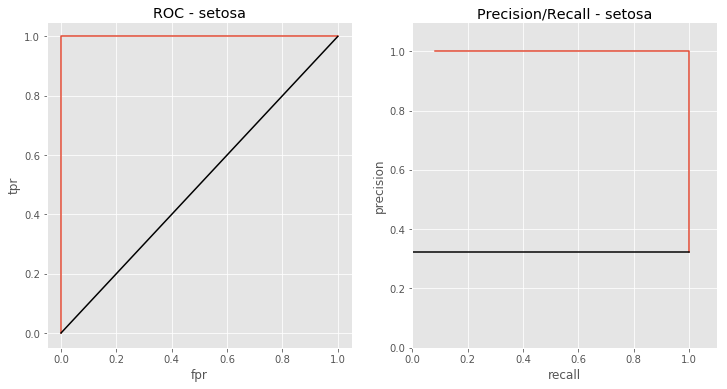

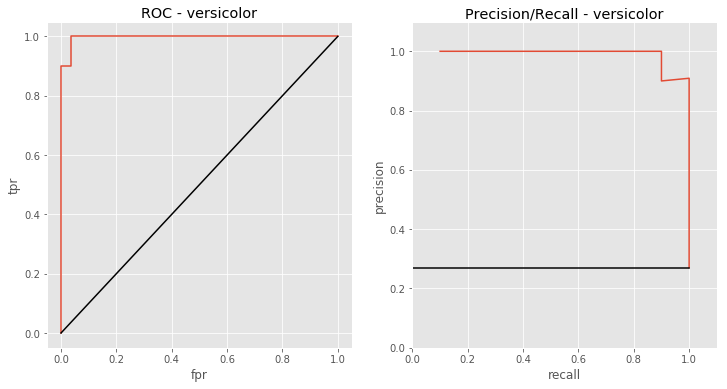

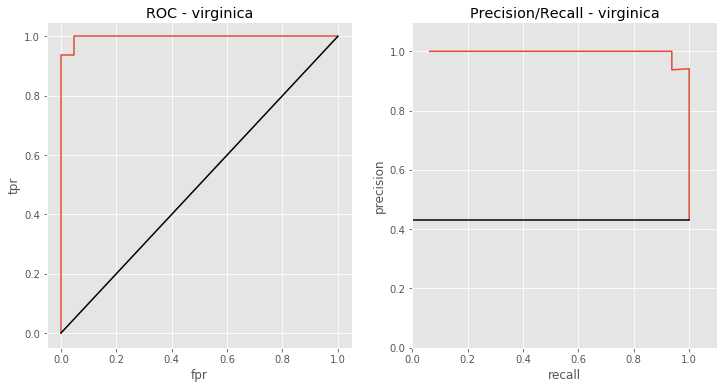

In [19]:
for i in range(num_outputs):
    fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
    df = c.calculate_threshold_values(i)
    c.plot_roc(ax0, df, i)
    c.plot_precision_recall(ax1, df, i)

# 9) Scatter Plot of Full Iris Data (no ML)

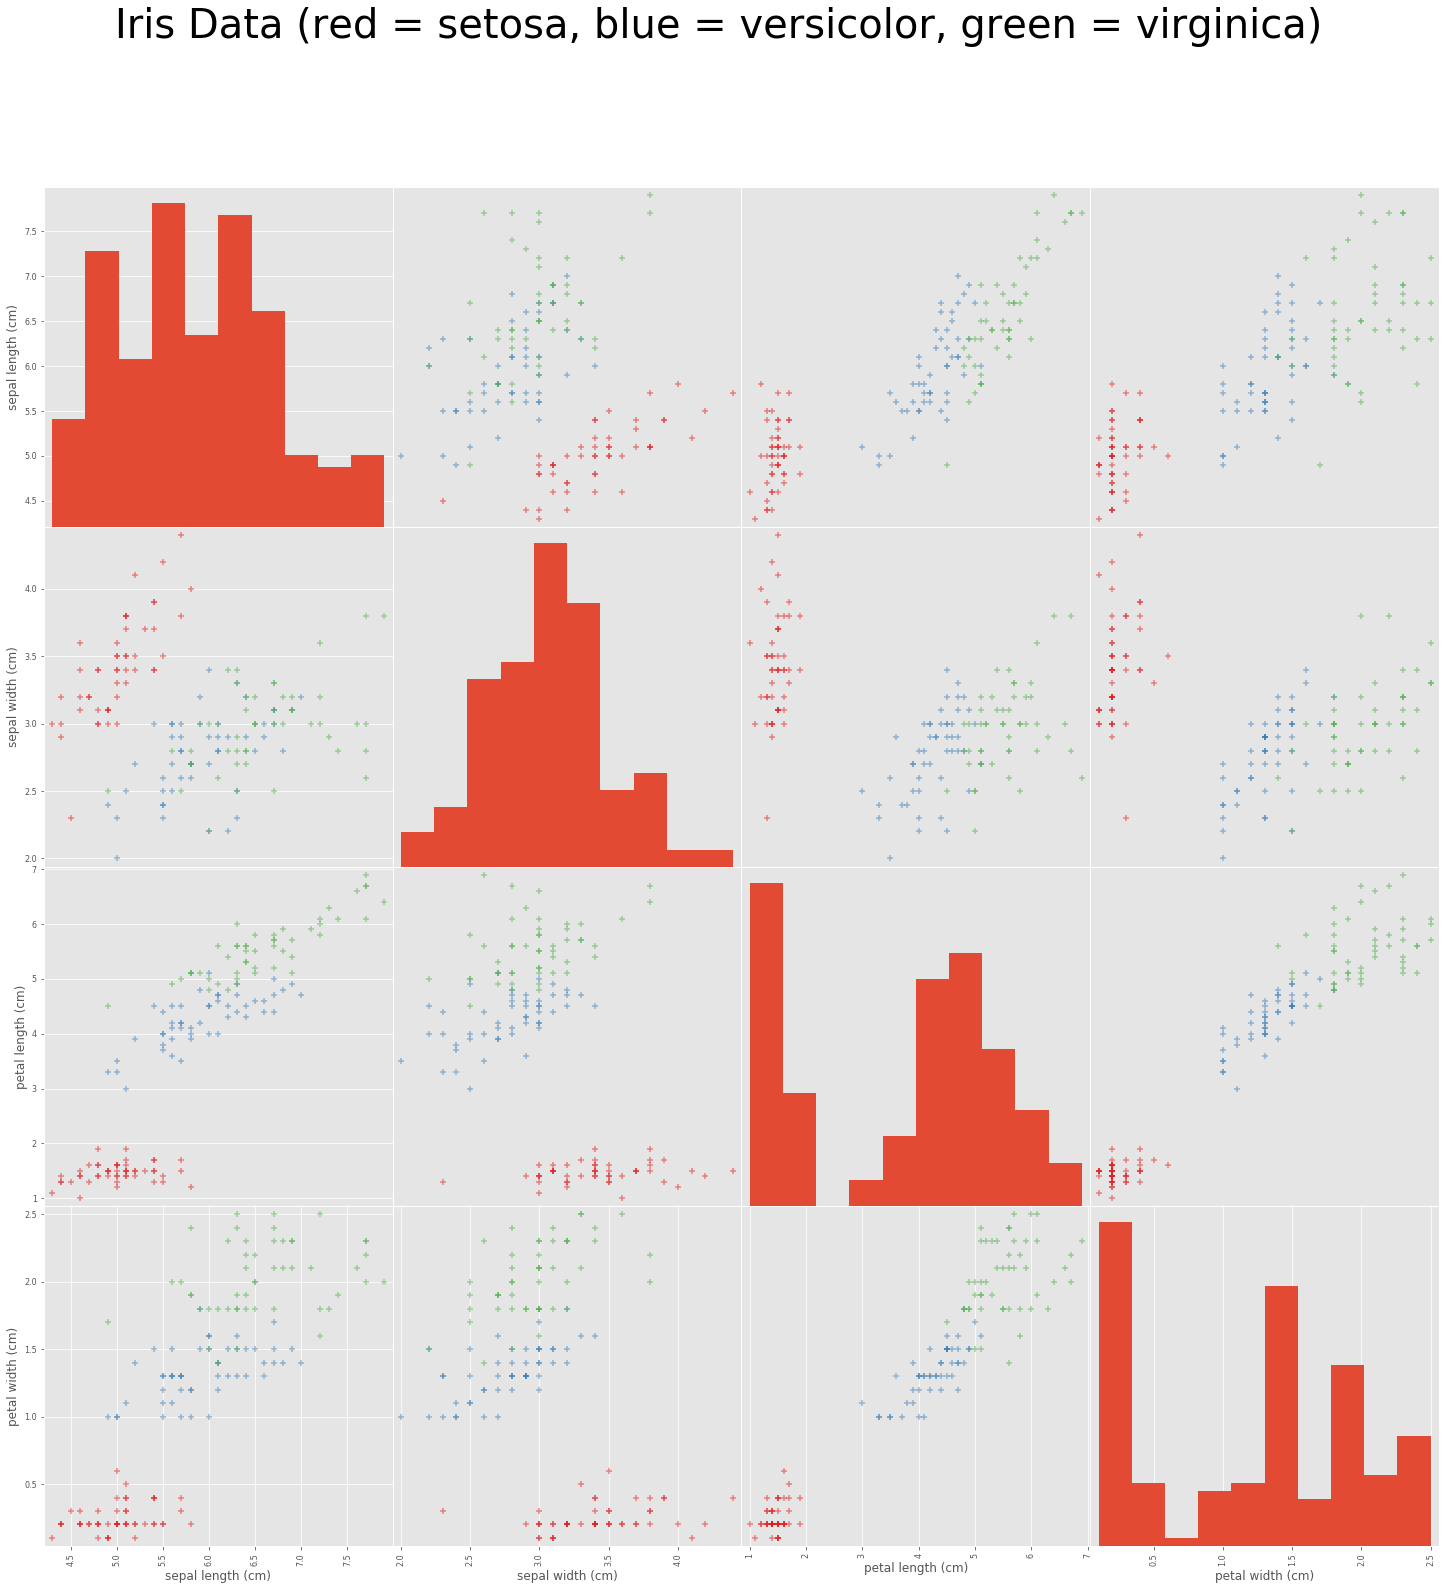

In [20]:
palette = {'#e41a1c': 'red', '#377eb8': 'blue', '#4eae4b': 'green'}
p = Plots(full_df, name_dict, 'species', palette)
t = p.write_plot_title('Iris Data')
p.create_scatter_matrix(t)

# 10) Scatter Plot of Iris Test Predictions - Misclassified Values Indicated

## Modify Test DataFrame to Indicate Misclassified Values

In [25]:
eval1 = Evaluation(test_df, y_pred, name_dict)
test_df = eval1.add_pred_classification_to_df()

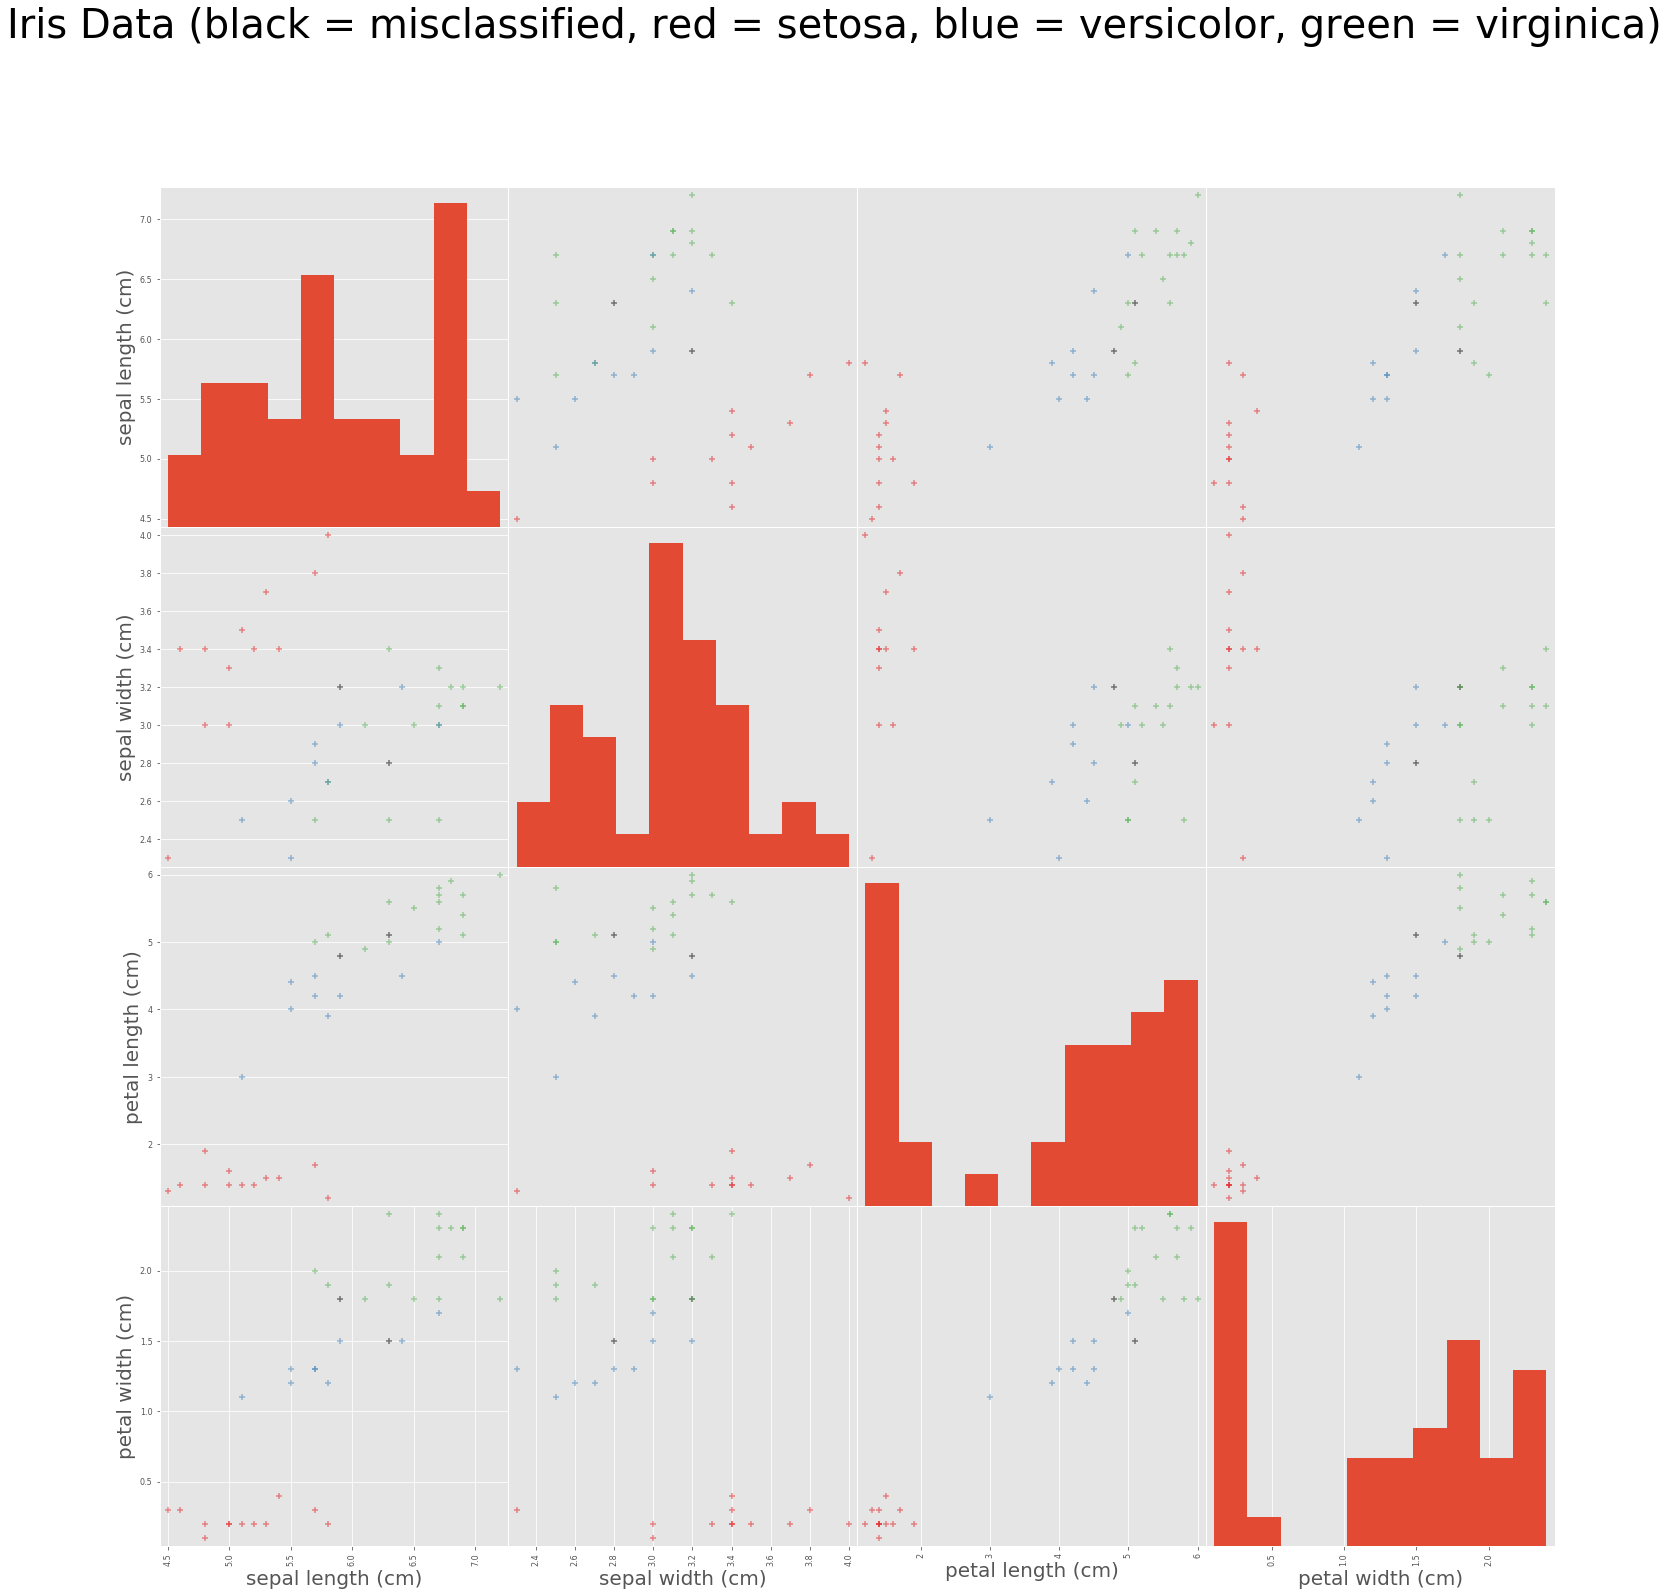

In [27]:
p2 = Plots(test_df, name_dict, 'species', palette)
t2 = p2.write_plot_title('Iris Data', True)
p2.create_scatter_matrix(t2, True)